# Проект 2. Разведывательный анализ данных

Описание и цели проекта отражены в отдельном фале README.

In [1]:
# Подгружаем необходимые библиотеки и сам датафрейм.
import pandas as pd
import numpy as np
from collections import Counter
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import PercentFormatter
%matplotlib inline
from scipy.stats import ttest_ind

import pylab
from pprint import pprint

In [2]:
#  Для "красоты" меняем стиль графиков
mpl.style.use('Solarize_Light2')

# Читаем файл, смотрим что там есть
df = pd.read_csv('stud_math.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


В датафрейме содержится 30 столбцов - данные на 395 строк (студентов), 13 столбцов числовых и 17 номинативных.
Наименование столбцов вполне себе рабочее и переименовывать большого смысла нет.

In [3]:
pd.set_option('display.max_columns', 30)
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


В первых же 10 строчках датафрейма видно что есть значения NaN причем в нескольких как числовых так и номинативных столбцах. Надо с этим что-то делать!

## Далее построение анализа будет разбито на 2 части
### 1. Анализ Номинативных значений датафрейма
### 2. Анализ числовых значений датафрейма

Поскольку номинативные и числовые данные принципиально разные, то пришла идея написать функции, которые будут обрабатывать и оценивать каждый столбец выдавая график, статистику, наличие выбросов и т.д. и т.п.

#### Часть 1 - Анализ Номинативных значений датафрейма

In [4]:
# Функция, которая будет заменять NaN и вместо них подставлять None 
# в столбцах c типом данных - Object
def replace_Nan_object(df, column_name):
    df[column_name] = df[column_name].astype(str).apply(
        lambda x: None if x.strip() == '' else x)

In [5]:
# Функция, которая производит анализ столбца object (номинативного)
# и передает в график количество пустых и не пустых значений в абсолютных и
# относительных цифрах. Также строится прогрессивный накопительный график
# который служит для удобства оценки значений покрывающих наибольший объем.

def analysis_object(df, column_name):
    
    print("Столбец - ", column_name)
    null_count = len(df[df[column_name].isnull()])
    total_count = len(df)

    NaN_count = len(df[column_name][df[column_name] == 'nan'])
    print("Количество пустых значений = {0} из {1} ({2:.2f}%)".format(
        null_count, total_count, null_count/total_count*100))
    print("Количество пустых значений (NaN) = {0} из {1} ({2:.2f}%)".format(
        NaN_count, total_count, NaN_count/total_count*100))
    print("Количество уникальных значений = ",
          df[column_name].nunique() - 1 if NaN_count > 0 else 0)
    print("Список значений = ",
          df[column_name].unique())
    data = df[column_name]

    fig, axes = plt.subplots(1, 2, figsize=(12, 3))
    axes[0].set_title('Распределение кол-ва значений\n столбца ' + column_name)
    axes[0].tick_params(labelrotation=45)
    hst = Counter(data)
    max_value = sum(hst.values())
    x = [tupl[0] for tupl in hst.most_common()]
    y = [tupl[1] for tupl in hst.most_common()]
    for i, y_i in enumerate(y):
        axes[0].text(i-0.3, 0.1*max(y), str(y_i)+' ≈ '+"{0:.0f}%".format(y_i/max_value*100), color='maroon',
                     fontweight='bold', fontsize=16, rotation=75)
    axes[0].bar(x, y)

    axes[1].set_title(
        "Относительное значение \n столбца {} накопительной суммой".format(column_name))
    axes[1].tick_params(labelrotation=45)
    y = [tupl[1]/max_value for tupl in hst.most_common()]
    y_2 = [sum(y[:i+1]) for i in range(len(y))]
    axes[1].yaxis.set_major_formatter(PercentFormatter(1))
    axes[1].bar(x, y_2)
    for i, y_i in enumerate(y_2):
        axes[1].text(i-0.3, 0.3*max(y), "{0:.0f}%".format(y_i*100),
                     color='maroon', fontweight='bold', fontsize=16, rotation=75)

##### Анализируем столбец school
Используем аналитическую функцию

Столбец -  school
Количество пустых значений = 0 из 395 (0.00%)
Количество пустых значений (NaN) = 0 из 395 (0.00%)
Количество уникальных значений =  0
Список значений =  ['GP' 'MS']


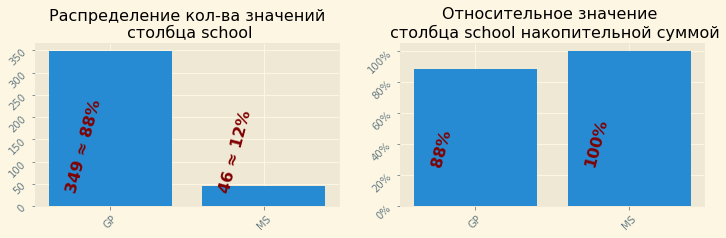

In [6]:
analysis_object(df, df.school.name)

 Выводы:
 * пропущенных значений типа NaN: НЕТ
 * уникальных значений: 2, покрывающих 100% данных
 * в данных очевидное преимущество одного признака над другим, но меньший признак более 10%, что может сиграть роль на последующем анализе данных.
 
##### Анализируем столбец sex
Используем аналитическую функцию

Столбец -  sex
Количество пустых значений = 0 из 395 (0.00%)
Количество пустых значений (NaN) = 0 из 395 (0.00%)
Количество уникальных значений =  0
Список значений =  ['F' 'M']


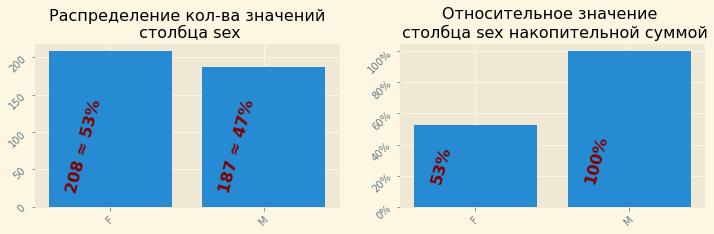

In [7]:
analysis_object(df, df.sex.name)

 Выводы:
 * пропущенных значений типа NaN: НЕТ
 * уникальных значений: 2, покрывающих 100% данных
 * данные распределены равномерно и годны для использования при последующем анализе данных.
 
##### Анализируем столбец address
Используем аналитическую функцию

Столбец -  address
Количество пустых значений = 17 из 395 (4.30%)
Количество пустых значений (NaN) = 0 из 395 (0.00%)
Количество уникальных значений =  0
Список значений =  ['U' nan 'R']


TypeError: 'value' must be an instance of str or bytes, not a float

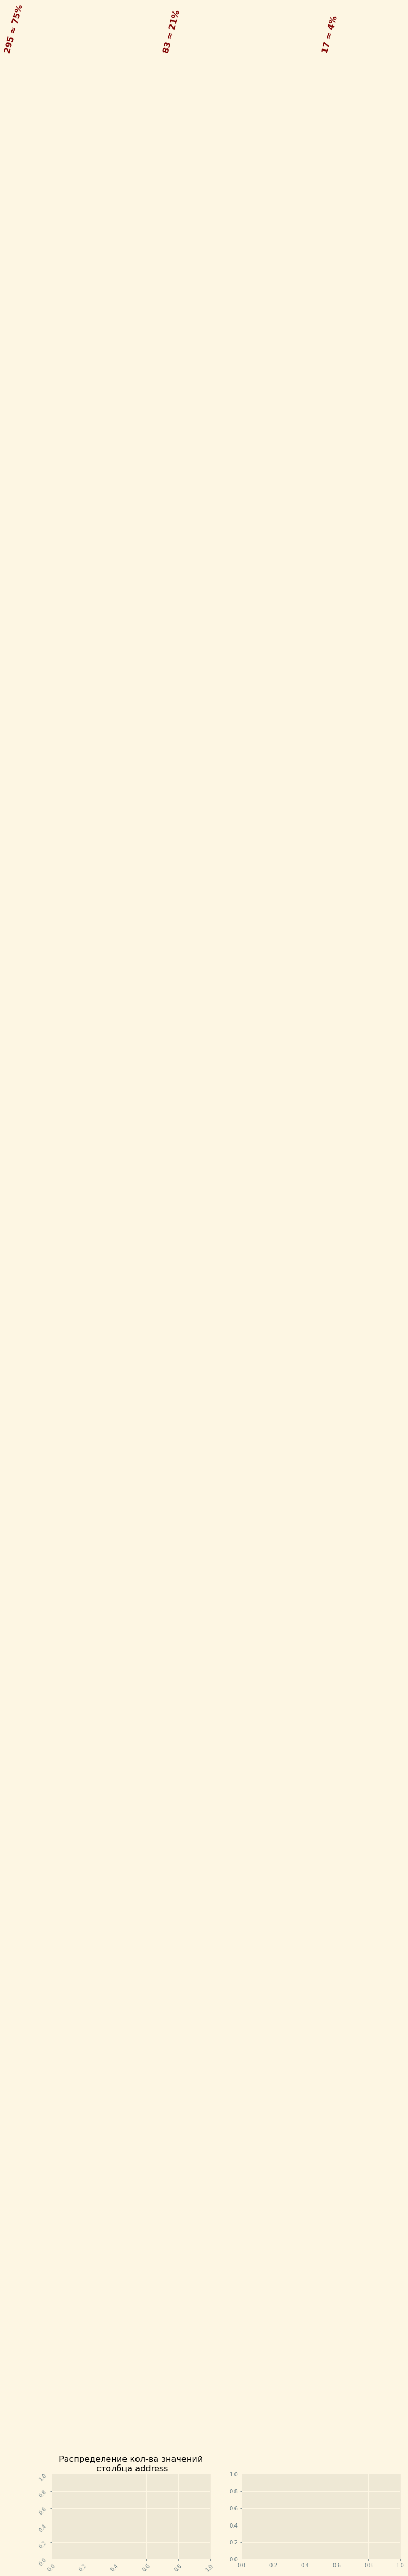

In [8]:
analysis_object(df, df.address.name)

<font color='blue'>Из-за присутствия пустых значений NaN, функция выдала ошибку при построении графика.
Для исправления ситуации сначала запускаем функцию replace_Nan_object и потом вновь фукцию аналитики.
Далее при таких ошибках поступаем точно также.</font>

Столбец -  address
Количество пустых значений = 0 из 395 (0.00%)
Количество пустых значений (NaN) = 17 из 395 (4.30%)
Количество уникальных значений =  2
Список значений =  ['U' 'nan' 'R']


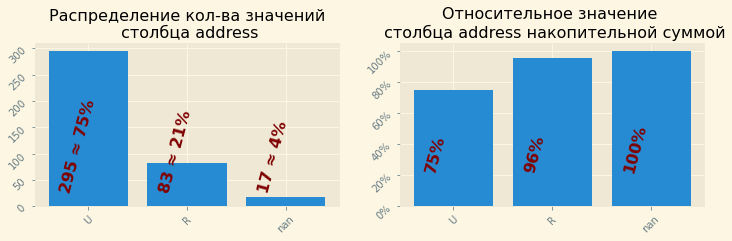

In [10]:
replace_Nan_object(df, df.address.name)
analysis_object(df, df.address.name)

 Выводы:
 * количество NaN значений: незначительное - менее 5%
 * уникальных значений: 2, покрывающих 96% данных столбца
 * в данных очевидное преимущество одного признака над другим, но меньший признак более 20%, что может сиграть роль на последующем анализе данных.

##### Анализируем столбец famsize
Используем аналитическую функцию после функции подмены NaN значений

Столбец -  famsize
Количество пустых значений = 0 из 395 (0.00%)
Количество пустых значений (NaN) = 27 из 395 (6.84%)
Количество уникальных значений =  2
Список значений =  ['nan' 'GT3' 'LE3']


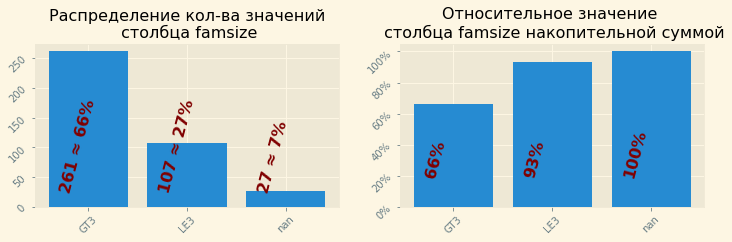

In [11]:
replace_Nan_object(df, df.famsize.name)
analysis_object(df, df.famsize.name)

 Выводы:
 * количество NaN значений: незначительное - менее 7%
 * уникальных значений: 2, покрывающих 93% данных столбца
 * в данных есть смещение в сторону одного из значений. Размер выборки достаточен для проведения анализа данных.
 
##### Анализируем столбец Pstatus
Используем аналитическую функцию после функции подмены NaN значений

Столбец -  Pstatus
Количество пустых значений = 0 из 395 (0.00%)
Количество пустых значений (NaN) = 45 из 395 (11.39%)
Количество уникальных значений =  2
Список значений =  ['A' 'nan' 'T']


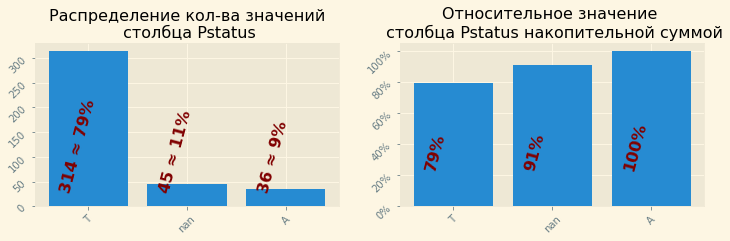

In [12]:
replace_Nan_object(df, df.Pstatus.name)
analysis_object(df, df.Pstatus.name)

 Выводы:
 * количество NaN значений: существенное - 11%
 * уникальных значений: 2, покрывающих 89% данных столбца
 * в данных есть существенное смещение в сторону одного из значений. Возможность использования столбца в дальнейшем анализе не высокая. Рассмотреть исключение столбеца из последующего анализа
 
##### Анализируем столбец Mjob
Используем аналитическую функцию после функции подмены NaN значений

Столбец -  Mjob
Количество пустых значений = 0 из 395 (0.00%)
Количество пустых значений (NaN) = 19 из 395 (4.81%)
Количество уникальных значений =  5
Список значений =  ['at_home' 'health' 'other' 'services' 'teacher' 'nan']


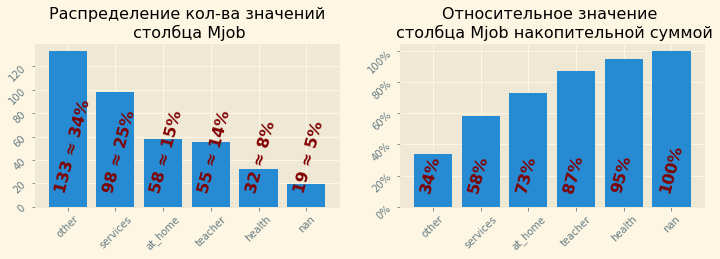

In [13]:
replace_Nan_object(df, df.Mjob.name)
analysis_object(df, df.Mjob.name)

Выводы:
 * количество NaN значений: незначительное - 5%
 * уникальных значений: 4, покрывающих 62% данных столбца
 * данные распределены равномерно и могут быть использованы для последующего анализа
 
##### Анализируем столбец Fjob
Используем аналитическую функцию после функции подмены NaN значений

Столбец -  Fjob
Количество пустых значений = 0 из 395 (0.00%)
Количество пустых значений (NaN) = 36 из 395 (9.11%)
Количество уникальных значений =  5
Список значений =  ['teacher' 'other' 'nan' 'health' 'services' 'at_home']


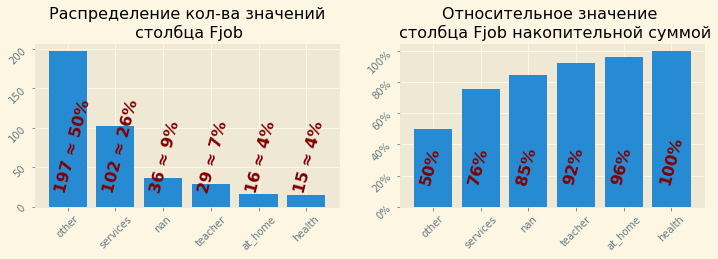

In [15]:
replace_Nan_object(df, df.Fjob.name)
analysis_object(df, df.Fjob.name)

Выводы:
 * количество NaN значений: умеренное - 9%
 * уникальных значений: 4, покрывающих всего лишь 41% данных столбца
 * данные распределены не равномерно и существенное смещение идет в сторону значения "other", которое не несет достаточной информации для анализа. Возможность использования столбца в дальнейшем анализе не высокая. Рассмотреть исключение столбеца из последующего анализа.
 
##### Анализируем столбец reason
Используем аналитическую функцию после функции подмены NaN значений